In [1]:
import os
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
FILE_PATH = "data.csv"
PLOT_PATH = "plot.png"

In [3]:
def load_data():
    """Load weight data from CSV. Returns empty DataFrame if file doesn't exist."""
    if not os.path.exists(FILE_PATH):
        return pd.DataFrame(columns=["Date", "Weight"])

    df = pd.read_csv(FILE_PATH)
    df["Date"] = pd.to_datetime(df["Date"])
    return df

In [4]:
def plot(df):
    plt.figure(figsize=(12, 6), dpi=600)
    for x in df:
        if x != 'Date':
            if x == 'Weight':
                plt.plot(df['Date'], df[x], label="Weight", marker="o", color="royalblue")
            else:
                plt.plot(df['Date'], df[x], label="EMA 7", linestyle="--", color="green")

                

    plt.title("Weight Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Weight")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.close()

In [ ]:
def preprocess_data():
    """
    Load, interpolate, and calculate required columns:
    EMA, daily deltas, and days since first record.
    """
    df_original = load_data()
    plot(df_original)

    if df_original.empty:
        print("No data found. Please record your first weight.")
        return pd.DataFrame()

    # Interpolate missing dates
    df = df_original.set_index("Date")
    all_days = pd.date_range(df.index.min(), df.index.max())
    df = df.reindex(all_days)

    # Interpolate missing weights linearly
    df["Weight"] = df["Weight"].interpolate(method="linear")

    # Calculate daily change and EMAs
    # df["DailyDelta"] = df["Weight"].diff()
    df["EMA7"] = df["Weight"].ewm(span=7, adjust=False).mean()
    df["EMA30"] = df["Weight"].ewm(span=30, adjust=False).mean()

    # Reset index and filter original dates only
    df = df.reset_index().rename(columns={"index": "Date"})
    plot(df)
    df_final = df[df["Date"].isin(df_original["Date"])].copy()

    # Calculate days since first entry & weight delta
    df_final["Days"] = (df_final["Date"] - df_final["Date"].iloc[0]).dt.days
    df_final["Delta"] = df_final["Weight"].diff()

    return df_final[
        ["Date", "Days", "Weight", "Delta", "EMA7", "EMA30"]
    ]

In [6]:
def show_records():
    """Display all processed weight records in a clean table."""
    df = preprocess_data()
    if df.empty:
        return

    with pd.option_context(
        "display.max_rows", None,
        "display.max_columns", None,
        "display.width", 700,
        "display.float_format", "{:.2f}".format
    ):
        print(df)

In [7]:
def plot_records():
    """Generate and save a weight trend plot with EMAs."""
    df = preprocess_data()
    if df.empty:
        return
    plt.figure(figsize=(12, 6), dpi=600)
    plt.plot(df["Date"], df["Weight"], label="Weight", marker="o", color="royalblue")
    plt.plot(df["Date"], df["EMA7"], label="EMA 7", linestyle="--", color="green")
    plt.plot(df["Date"], df["EMA30"], label="EMA 30", linestyle="--", color="orange")

    plt.title("Weight Trend Over Time")
    plt.xlabel("Date")
    plt.ylabel("Weight")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    plt.close()
    

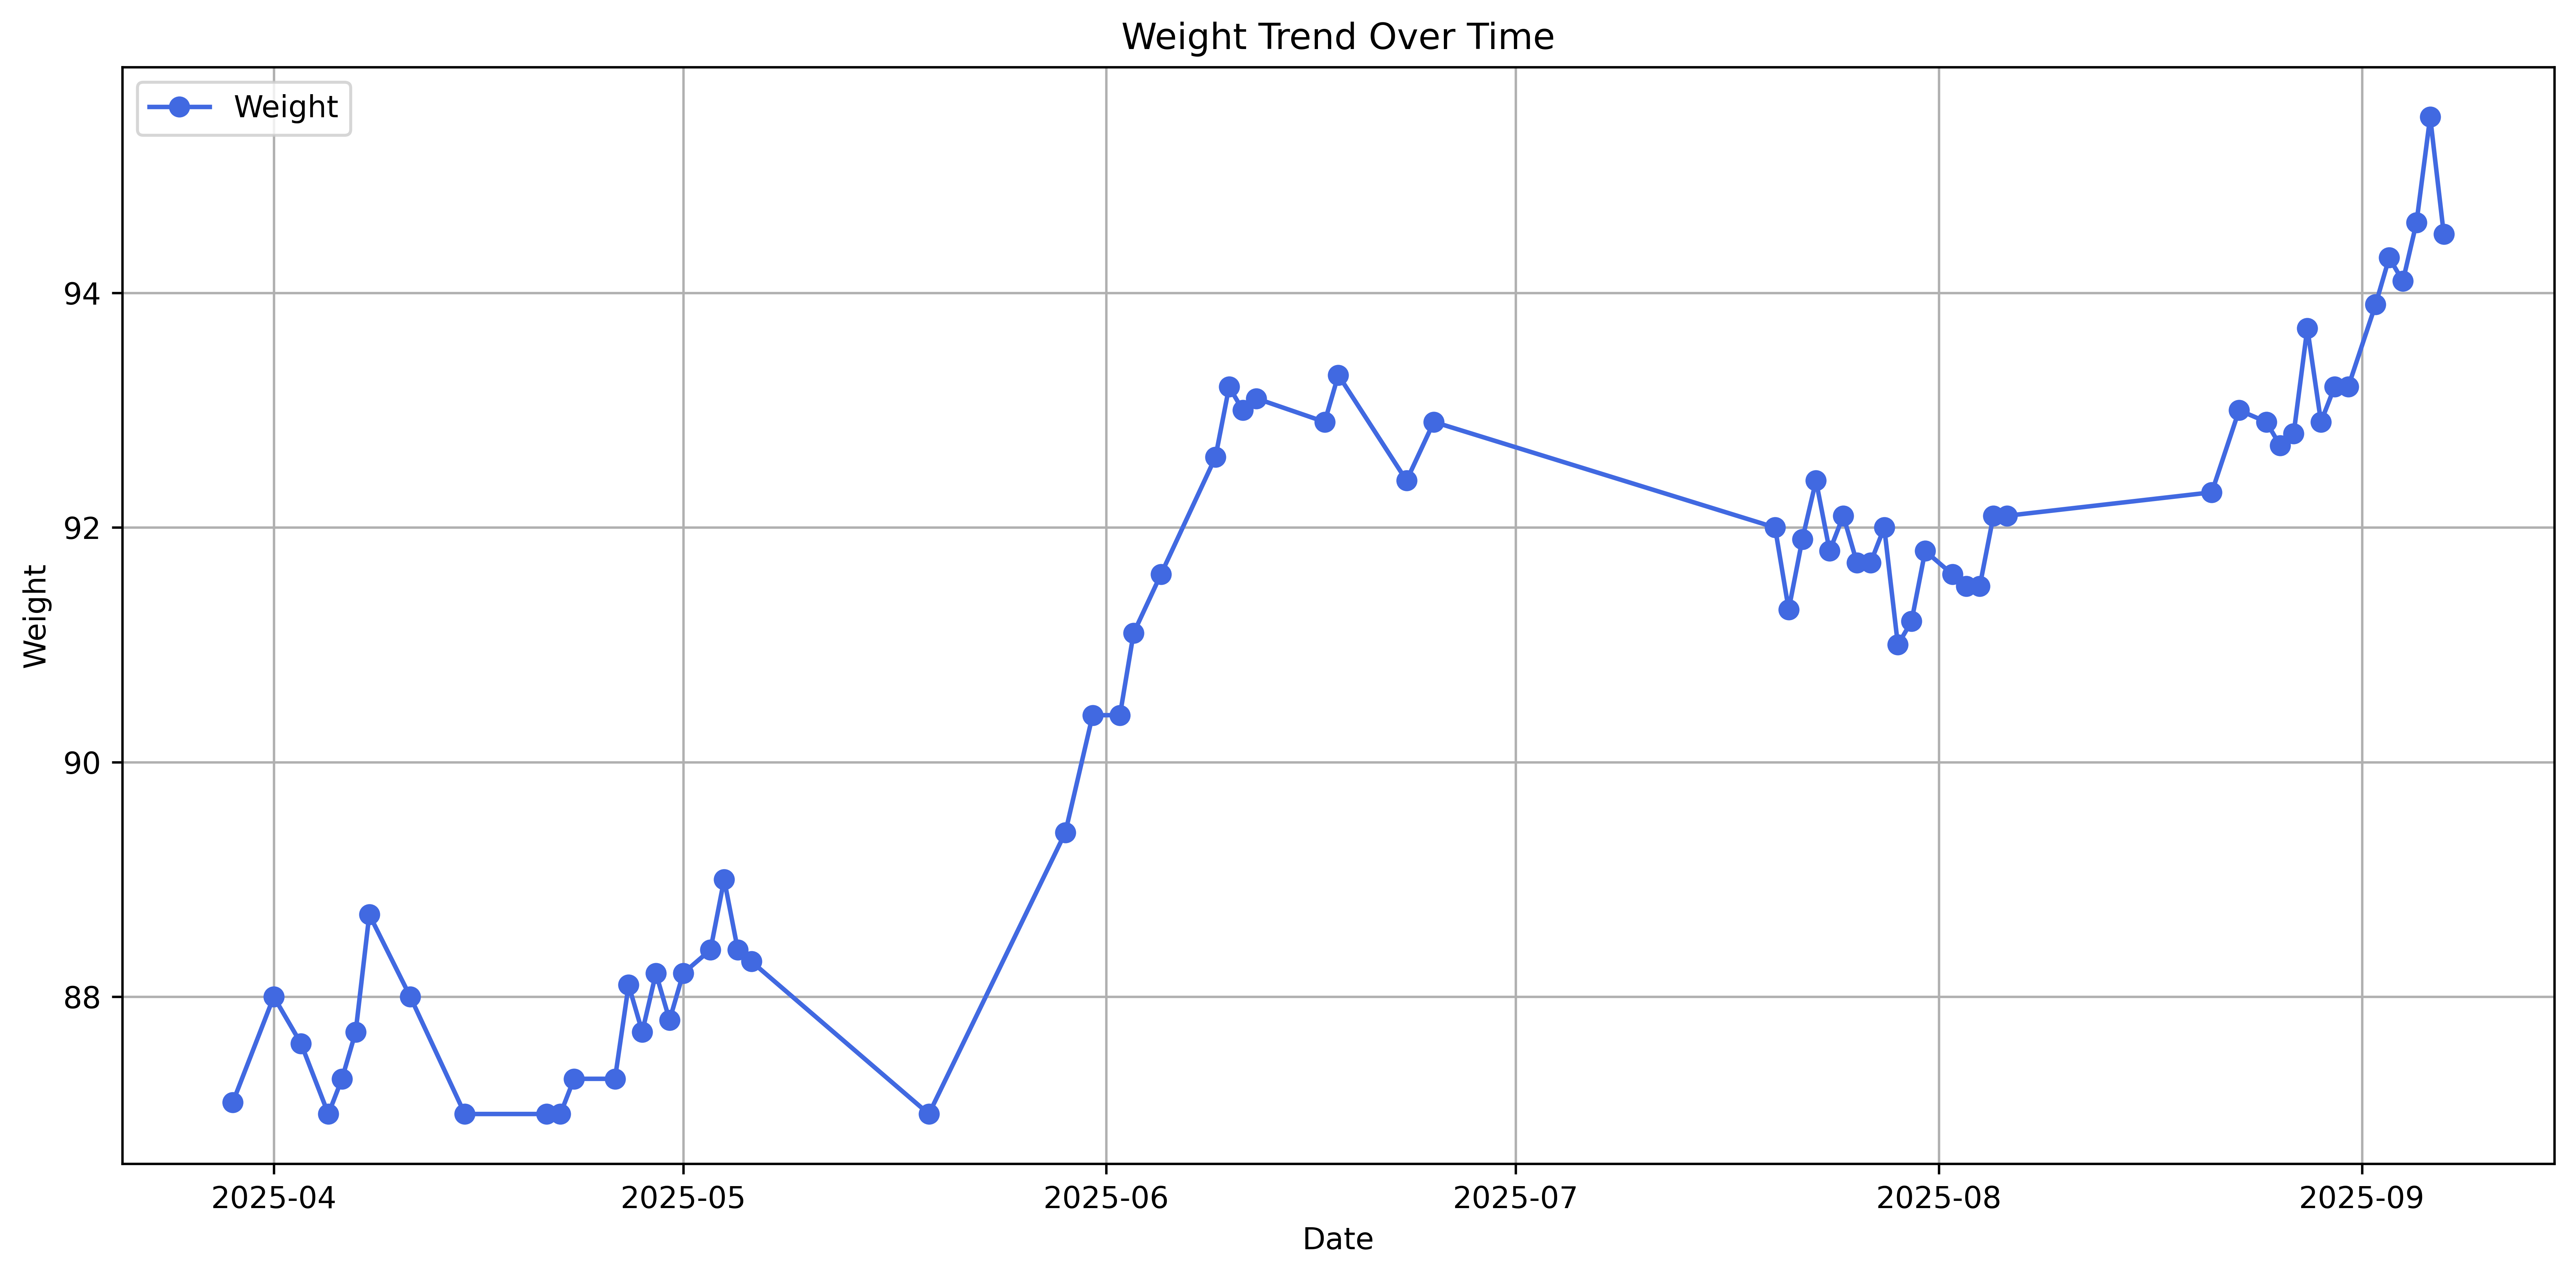

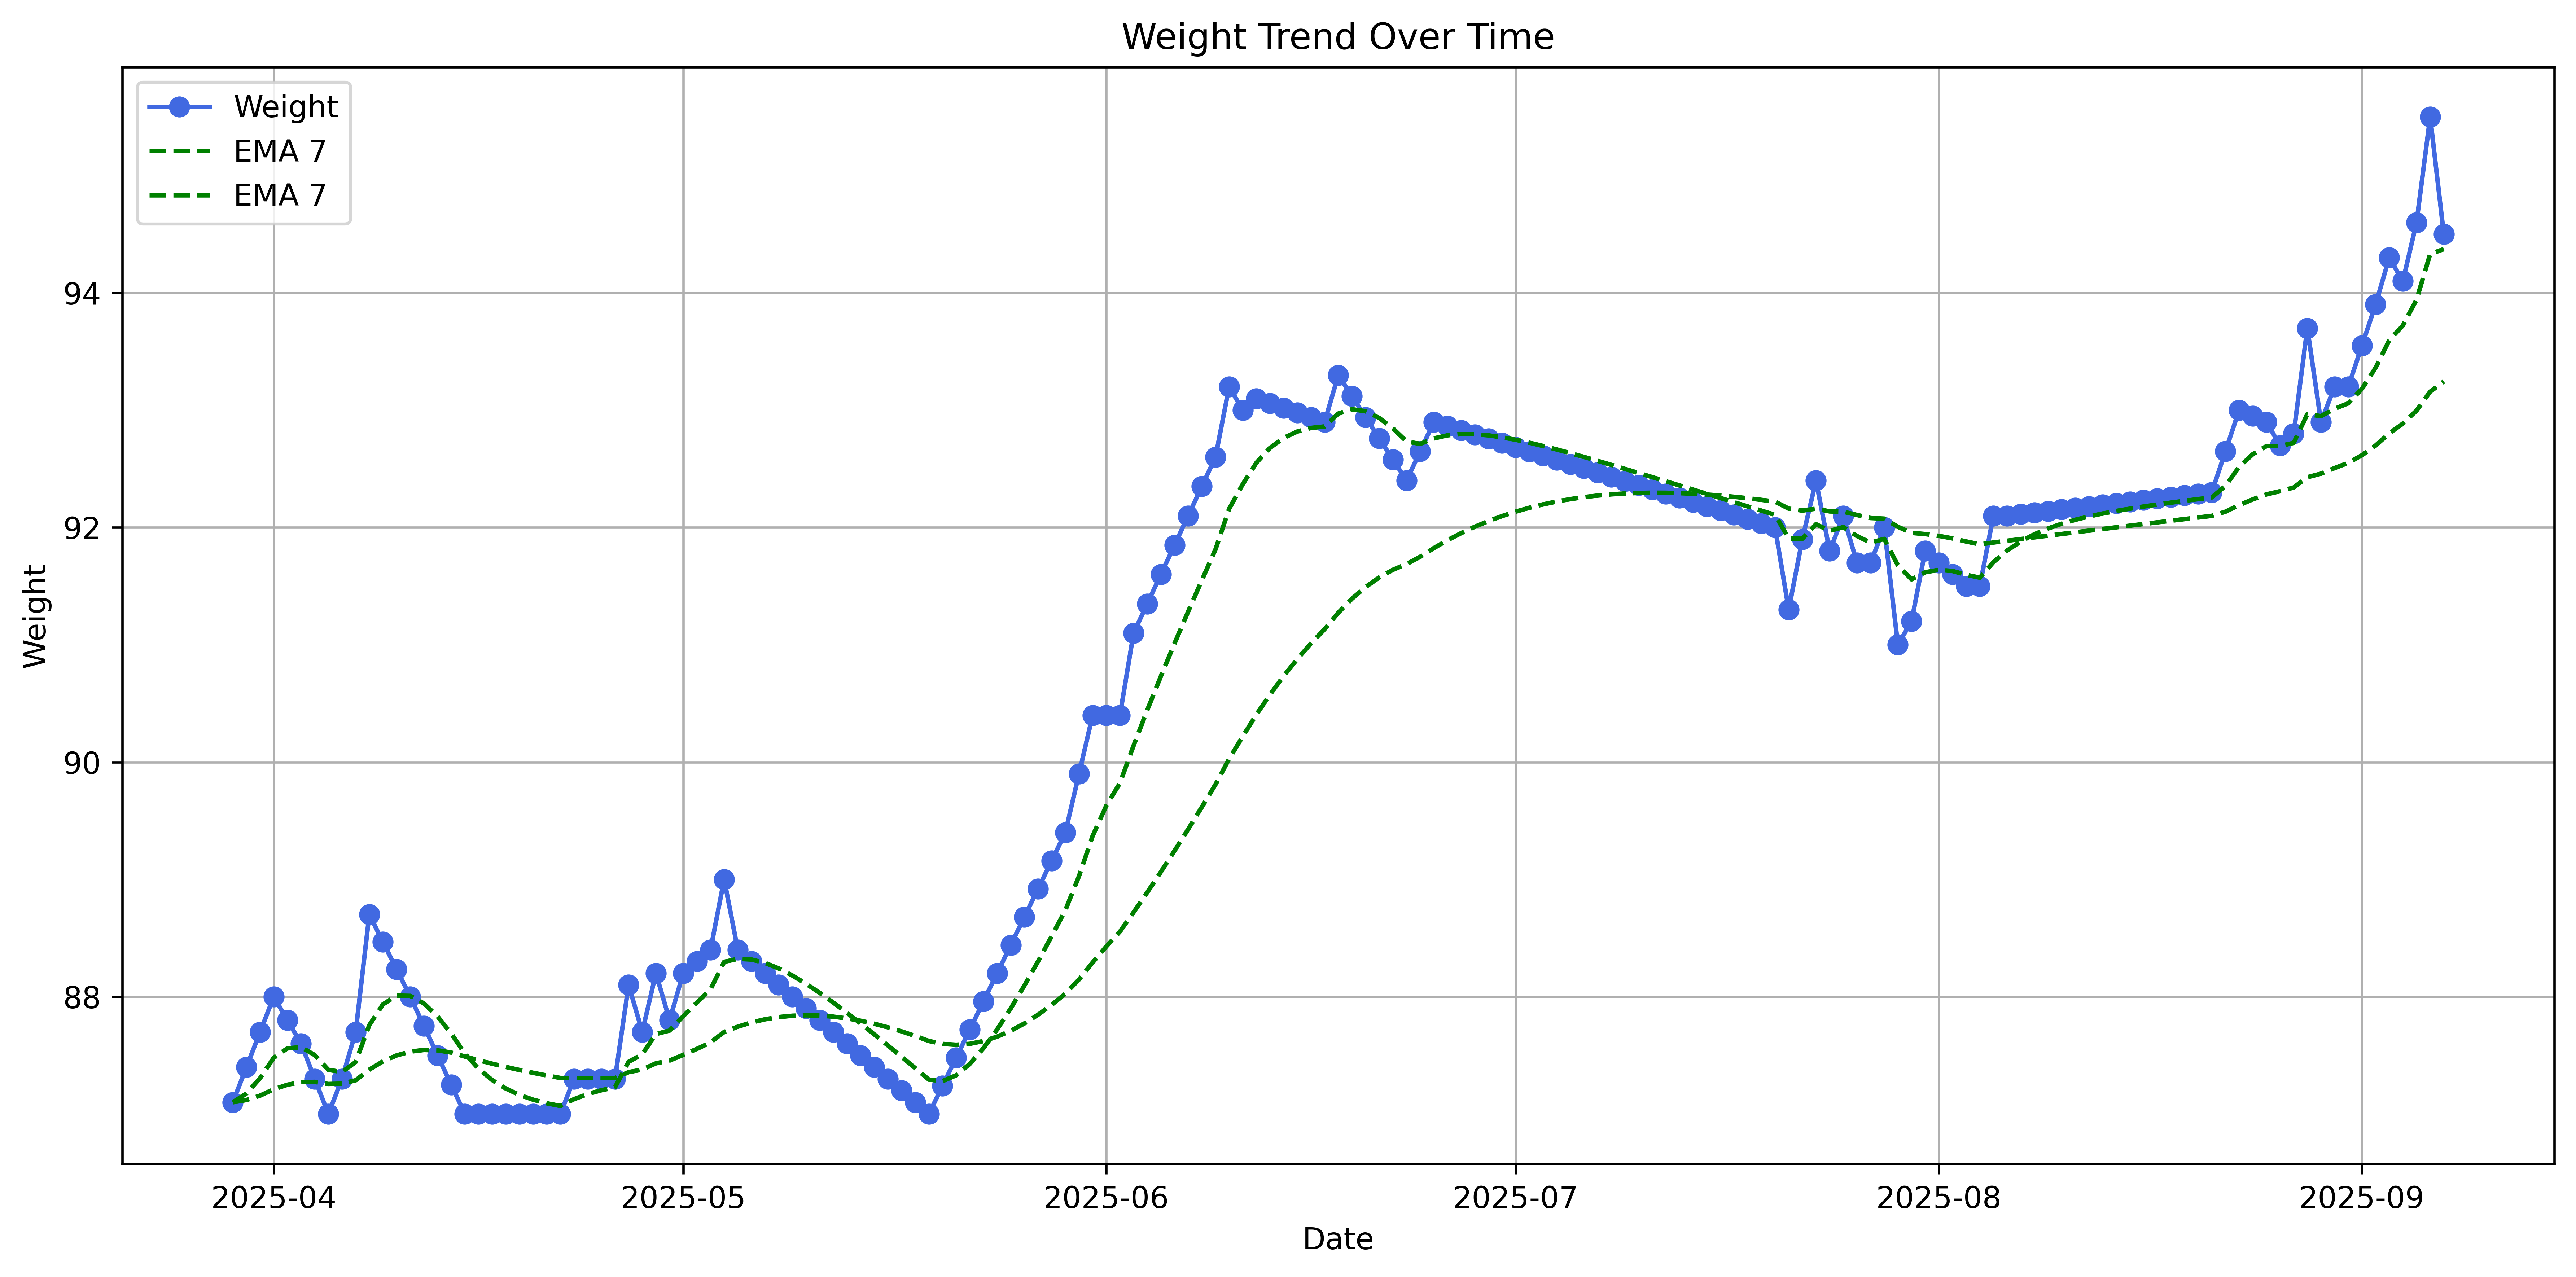

KeyError: "['DailyDelta'] not in index"

In [8]:
plot_records()